# Python Implementation of KNN
Let’s implement a `K-nearest neighbors` classifier in Python. We will implement it as a custom Scikit-Learn estimator by extending the `BaseEstimator` class.

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.base import BaseEstimator
from scipy.stats import mode

In [3]:
class KNNClassifier(BaseEstimator):
    def __init__(self, k=5):
        self.k = k        
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
                
    def predict(self, x):
        distances = np.linalg.norm(self.X_train - x)
        neighbors_idx = distances.argsort()[:self.k]
        labels = self.y_train[neighbors_idx]
        return mode(labels)[0]

In [4]:
X_train = np.array([[1, 4, 1], [1, 0, -2], [0, 0, 1], [-1, 4, 0], [-1, -1, 1], [1, 2, 3], [0, -4, 0], [1, 0, -3]])
y_train = np.array([1, 0, 1, 1, 0, 1, 0, 0])

In [5]:
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)

knn.predict([1, 0, 1])

1

# KNN in Scikit-Learn

Scikit-Learn provides two nearest neighbors classifiers:

- **KNeighborsClassifier** uses the k nearest neighbors of the query point for the classification.
- **RadiusNeighborsClassifier** uses the neighbors within a fixed radius $r$ of the query point for the classification. This means that points in sparser neighborhoods use fewer neighbors for the classification.

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
print(f'Training set accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {clf.score(X_test, y_test):.4f}')

Training set accuracy: 0.8214
Test set accuracy: 0.8158


In [19]:
def plot_decision_boundaries(clf, X, y, feature_names, class_names, ax,
                             colors=['r', 'c', 'b'], markers=('s', 'o', '^'), legend='auto'):
    
    cmap = ListedColormap(colors)
      
    # create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # put the result into a color plot  
    plt.sca(ax)
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k', legend=legend)
    
    if feature_names:
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])

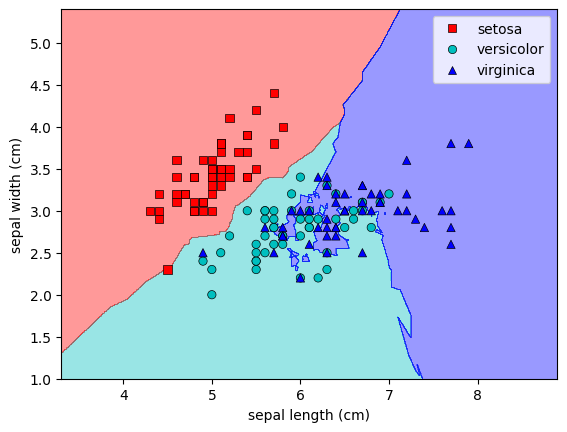

In [20]:
plot_decision_boundaries(clf, X, y, iris.feature_names, iris.target_names, plt.gca())

## Choosing the Number of Neighbors
The choice of the number of nearest neighbors $k$ is crucial as it can have a large impact on the performance of the algorithm.

- If $k$ is too small, then the algorithm may be sensitive to noise (mislabeled samples in the training set), hence it will have high variance.
- If $k$ is too large, the neighborhood of the query point may include too many points from irrelevant classes, and as a result the model will have high bias. 

In the extreme case, when $k = n$, then the prediction of the algorithm will always be the same (the majority of the labels in the entire training set).

Let’s examine the effect of changing $k$ on the performance of our model. We will train a KNN classifier on various values of $k$ in the range between $1$ and $100$ (with intervals of $5$), and then plot its accuracy on the training and the test sets:

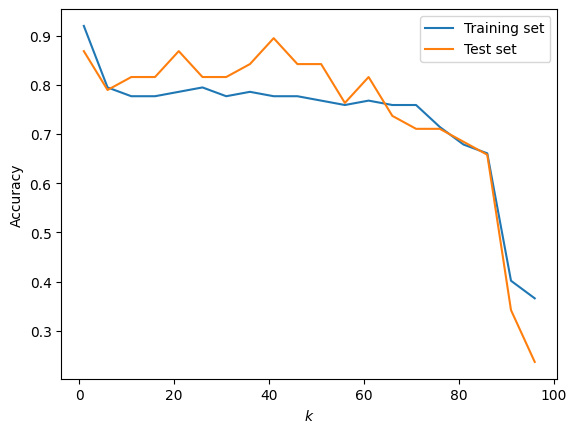

In [21]:
n_neighbors, train_scores, test_scores = [], [], []

for k in range(1, 100, 5):
    n_neighbors.append(k)
    clf = KNeighborsClassifier(n_neighbors=k)    
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.plot(n_neighbors, train_scores, label='Training set')
plt.plot(n_neighbors, test_scores, label='Test set')

plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.legend()

We can use grid search to find the optimal k for this data set:

In [25]:
scaler = StandardScaler()

param_grid = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 50),
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kneighborsclassifier', KNeighborsClassifier())
])

# grid search with a pipeline
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, error_score=np.nan)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [26]:
print(grid.best_params_)

{'kneighborsclassifier__n_neighbors': 22}


k = 2: test accuracy = 0.7895
k = 5: test accuracy = 0.8158
k = 10: test accuracy = 0.7368
k = 15: test accuracy = 0.7895
k = 22: test accuracy = 0.8421
k = 30: test accuracy = 0.8158


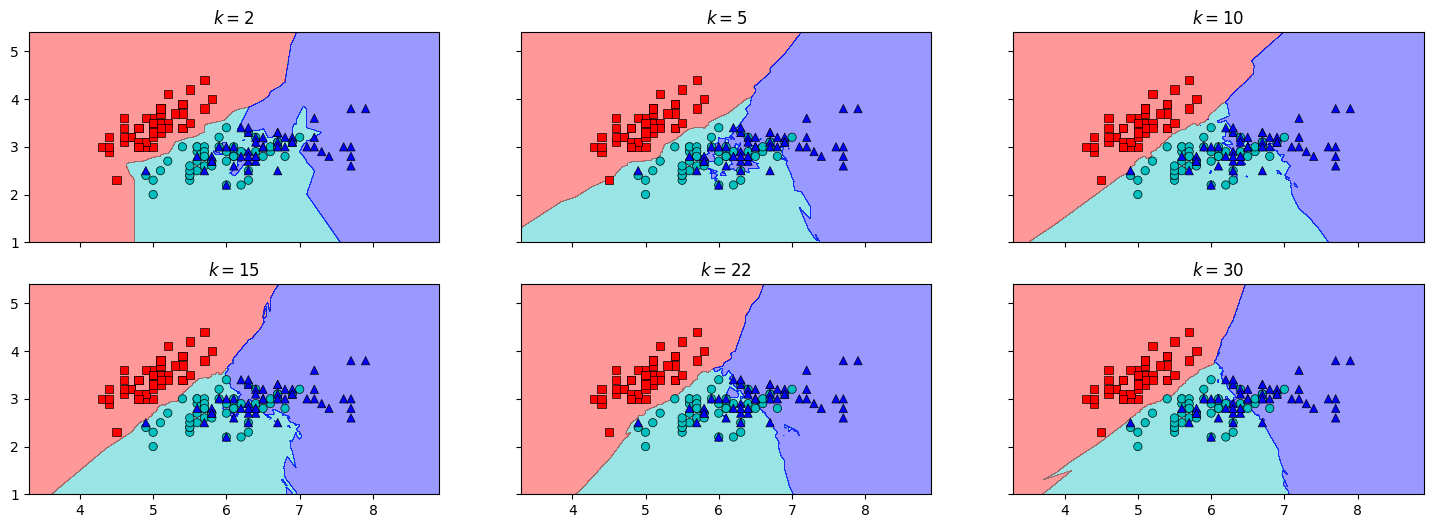

In [29]:
fig, axes = plt.subplots(2, 3, sharex='all', sharey='all', figsize=(18, 6))
k_arr = [2, 5, 10, 15, 22, 30]

for ax, k in zip(axes.flat, k_arr):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print(f'k = {k}: test accuracy = {test_score:.4f}')
    plot_decision_boundaries(clf, X, y, [], iris.target_names, ax, legend=False)
    plt.title(f'$k = {k}$')

## Choosing the Distance Metric
The distance metric used to compute the distances between the test point and the training samples can also have a large impact on the performance of KNN.

A commonly used distance metric for continuous variables is **Euclidean distance.** Euclidean distance is a special case of a more general metric known as **Minkowski distance.**

Given two vectors $x = (x_1, \cdots, x_n)$ and $y = (y_1, \cdots, y_n)$, the Minkowski distance of order $p$ between them is defined as:

$$d(x,y) = (\sum_{i=1}^n |x_i - y_i|^p)^{1/p}$$

Minkowski distance is typically used with $p = 1$ (Manhattan distance) or $p = 2$ (Euclidean distance).

For categorical/discrete variables, we typically use **Hamming distance.** Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different.

For example, assume that we have three categorical features: (vehicle_type, color, gear), and two data objects: (Bus, Green, Manual) and (Car, Green, Auto). Then, the Hamming distance between these objects is 2 (as they are different in 2 out of 3 attributes).

For text documents, cosine similarity is usually a better choice than Euclidean distance, since it is independent of the document length.

# K-Nearest Neighbors Regression
KNN can also be used for regression problems, where the data labels are continuous rather than discrete. In this case, the label assigned to the query point is the mean of the labels of its $k$ nearest neighbors.

Analogous to the classification classes, Scikit-Learn provides two neighbors regressors:

- **KNeighborsRegressor** uses the $k$ nearest neighbors of the query point for the prediction.
- **RadiusNeighborsRegressor** uses the neighbors within a fixed radius $r$ of the query point for the prediction.

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor

In [31]:
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
pipeline = Pipeline([    
    ('std_scaler', StandardScaler()),
    ('reg', KNeighborsRegressor())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg', KNeighborsRegressor())])

In [34]:
train_score = pipeline.score(X_train, y_train)
print('R2 score on the training set:', np.round(train_score, 4))

test_score = pipeline.score(X_test, y_test)
print('R2 score on the test set:', np.round(test_score, 4))

R2 score on the training set: 0.8072
R2 score on the test set: 0.6926


In [35]:
param_grid = {
    'reg__n_neighbors': np.arange(5, 101, 5),
    'reg__p': np.arange(1, 6),
}

grid = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'reg__n_neighbors': 15, 'reg__p': 1}


In [36]:
train_score = grid.score(X_train, y_train)
print('R2 score on the training set:', np.round(train_score, 4))

test_score = grid.score(X_test, y_test)
print('R2 score on the test set:', np.round(test_score, 4))

R2 score on the training set: 0.7746
R2 score on the test set: 0.7314
